Configuración

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir_base = r"Datos\Augmented"
conjuntos = ["conjunto_raw", "conjunto_bilateral", "conjunto_canny"]
num_classes = 3
batch_size = 32
num_epochs = 10
learning_rate = 1e-4

Transformar imágenes 

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

Entrenamiento 


Entrenando modelo con: conjunto_raw


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1/10 - Pérdida: 0.9605
Época 2/10 - Pérdida: 0.7871
Época 3/10 - Pérdida: 0.6787
Época 4/10 - Pérdida: 0.6116
Época 5/10 - Pérdida: 0.5473
Época 6/10 - Pérdida: 0.5026
Época 7/10 - Pérdida: 0.4796
Época 8/10 - Pérdida: 0.4336
Época 9/10 - Pérdida: 0.4245
Época 10/10 - Pérdida: 0.3964
Modelo guardado: mobilenet_conjunto_raw.pth
 Generando matriz de confusión para conjunto_raw...


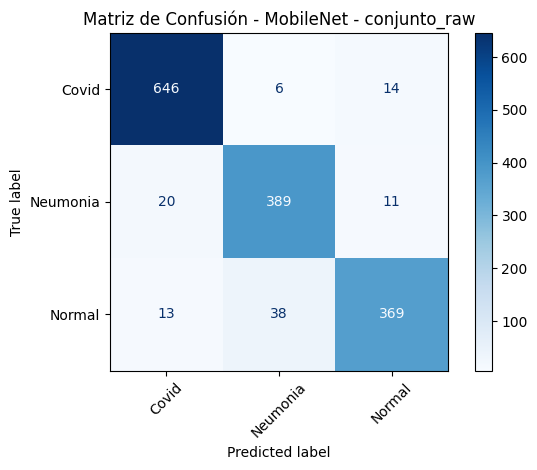


Entrenando modelo con: conjunto_bilateral


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1/10 - Pérdida: 1.0599
Época 2/10 - Pérdida: 0.8749
Época 3/10 - Pérdida: 0.7471
Época 4/10 - Pérdida: 0.6701
Época 5/10 - Pérdida: 0.5928
Época 6/10 - Pérdida: 0.5393
Época 7/10 - Pérdida: 0.4861
Época 8/10 - Pérdida: 0.4620
Época 9/10 - Pérdida: 0.4375
Época 10/10 - Pérdida: 0.4157
Modelo guardado: mobilenet_conjunto_bilateral.pth
 Generando matriz de confusión para conjunto_bilateral...


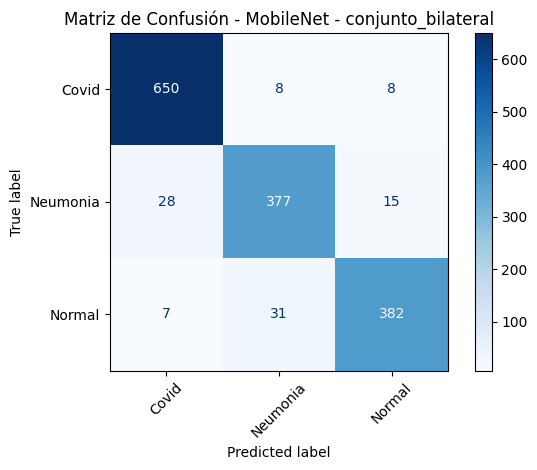


Entrenando modelo con: conjunto_canny


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Época 1/10 - Pérdida: 1.0530
Época 2/10 - Pérdida: 0.8180
Época 3/10 - Pérdida: 0.7015
Época 4/10 - Pérdida: 0.6409
Época 5/10 - Pérdida: 0.5955
Época 6/10 - Pérdida: 0.5478
Época 7/10 - Pérdida: 0.5204
Época 8/10 - Pérdida: 0.5084
Época 9/10 - Pérdida: 0.4894
Época 10/10 - Pérdida: 0.4794
Modelo guardado: mobilenet_conjunto_canny.pth
 Generando matriz de confusión para conjunto_canny...


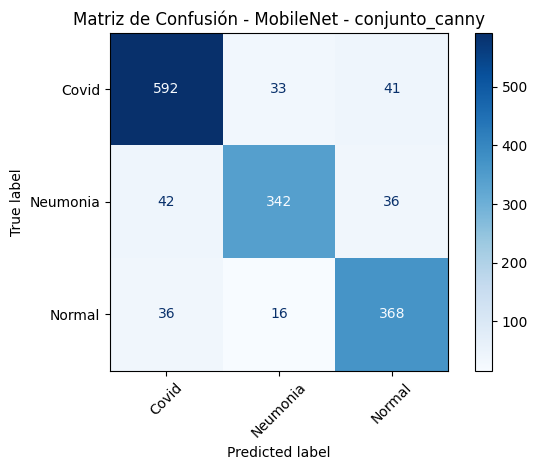

In [6]:
for conjunto in conjuntos:
    print(f"\nEntrenando modelo con: {conjunto}")

    data_path = os.path.join(data_dir_base, conjunto)
    dataset = datasets.ImageFolder(data_path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    #MobileNet 
    model = models.mobilenet_v2(pretrained=True)

    for param in model.features.parameters():
        param.requires_grad = False

    model.classifier[1] = nn.Linear(model.last_channel, num_classes)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Entrenamiento
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Época {epoch+1}/{num_epochs} - Pérdida: {running_loss/len(dataloader):.4f}")

    # Guardar el modelo entrenado
    torch.save(model.state_dict(), f"mobilenet_{conjunto}.pth")
    print(f"Modelo guardado: mobilenet_{conjunto}.pth")

        #Matriz de confusion 
    print(f" Generando matriz de confusión para {conjunto}...")
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"Matriz de Confusión - MobileNet - {conjunto}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_mobilenet_{conjunto}.png")
    plt.show()
